In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

## Reading Dataset and Preprocessing

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
for i in df.columns:
    if i != 'Pregnancies' and i != 'Outcome':
        df[i].replace(0, np.nan, inplace = True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_11820\867403175.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(0, np.nan, inplace = True)


In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

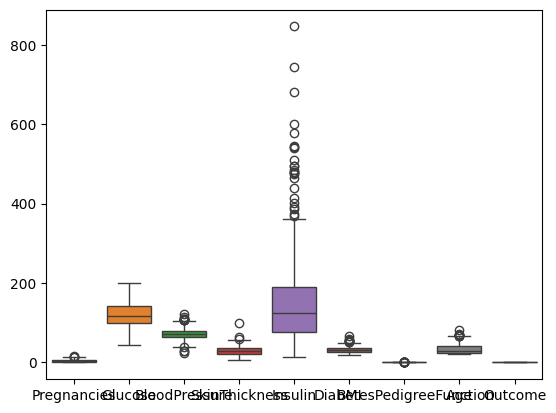

In [6]:
sns.boxplot(df)

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
impute_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
impute_median = SimpleImputer(missing_values = np.nan, strategy = "median")
df[['Glucose', 'SkinThickness', 'BMI']] = impute_mean.fit_transform(df[['Glucose', 'SkinThickness', 'BMI']])
df[['BloodPressure', 'Insulin']] = impute_median.fit_transform(df[['BloodPressure', 'Insulin']])

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.00000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.00000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.00000,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.15342,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.00000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.40000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.37250,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.00000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,1.00000,1.00


In [11]:
df.to_csv("diabetes_cleaned.csv")

In [12]:
df = pd.read_csv("diabetes_cleaned.csv")
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


## Splitting Data:

In [183]:
#Splitting data for training and testing in ratio of 0.2
X = df.drop(['Outcome', 'Unnamed: 0'], axis = 1)
y = df.Outcome

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [247]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Model training

In [274]:
model = RandomForestClassifier(n_estimators = 30, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

## Model Evaluations:

In [275]:
model.score(X_test, y_test)

0.7857142857142857

In [276]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7857


In [277]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.7857


In [278]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.4f}")

print("\nActual vs Predicted:")
correct_count = 0
wrong_count = 0

for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")
    if actual == predicted:
        correct_count += 1
    else:
        wrong_count += 1

print("\nTotal Correct Predictions:", correct_count)
print("Total Wrong Predictions:", wrong_count)

total_predictions = len(y_pred)
accuracy = correct_count / total_predictions
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

Accuracy: 0.7857
AUC-ROC: 0.8287

Actual vs Predicted:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predict

## Saving model to pickle file:

In [284]:
joblib.dump(model, 'diabetesModel.pkl')
joblib.dump(scaler, 'scaler.pkl')            

['scaler.pkl']